In [1]:
import os

from game_simulation1 import *
import matplotlib.pyplot as plt

### Cross entropy method Without Noise

#### Covariance-Based CEM using features DU2

Iteration 1: Average score of best samples: 214.5
Iteration 2: Average score of best samples: 278.3
Iteration 3: Average score of best samples: 1368.1
Iteration 4: Average score of best samples: 3904.8
Iteration 5: Average score of best samples: 5084.4
Iteration 6: Average score of best samples: 7429.3


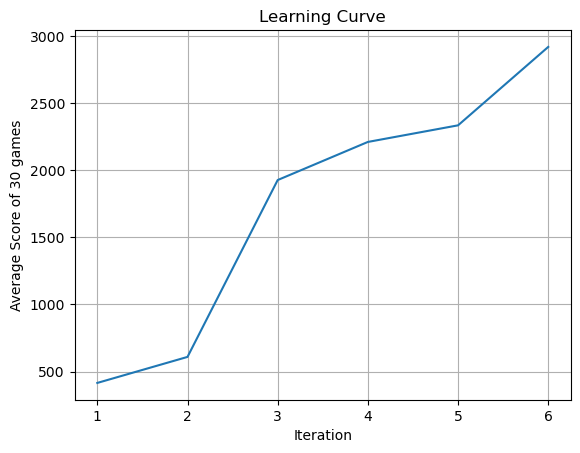

In [2]:
np.random.seed(42)
# Number of samples
N = 100
# Proportion of best samples to select
rho = 0.1
# Number of iterations
iterations = 6
# Number of games to play to compute the learning curve
num_games = 30

# Initialize the parameter vector w to zero
w = np.zeros(7)
# Initialize the covariance matrix Sigma to 100 * I
Sigma = 100 * np.eye(7)

learning_curve = []

for t in range(iterations):
    samples = np.random.multivariate_normal(w, Sigma, N)

    # Evaluate each sample with the score function (game simulation)
    scores = np.array([simulation(sample,2) for sample in samples])

    # Sort samples based on their score and select the best ones
    best_samples_indices = np.argsort(scores)[-int(N * rho):]
    best_samples = samples[best_samples_indices]

    # Update w with the empirical mean of the selected best samples
    w = np.mean(best_samples, axis=0)

    # Update Sigma with the empirical covariance of the selected best samples
    Sigma = np.cov(best_samples, rowvar=False)

    # Compute the learning curve with the mean weights of the new distribution
    # Play num_games games with these mean weights and record the scores
    
    game_scores = [simulation(w,2) for _ in range(num_games)]
    learning_curve.append(np.mean(game_scores))

    # Print the average score of the best samples at each iteration
    print("Iteration {}: Average score of best samples: {}".format(t+1, np.mean(scores[best_samples_indices])))


plt.plot(range(1, iterations + 1), learning_curve, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {num_games} games')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

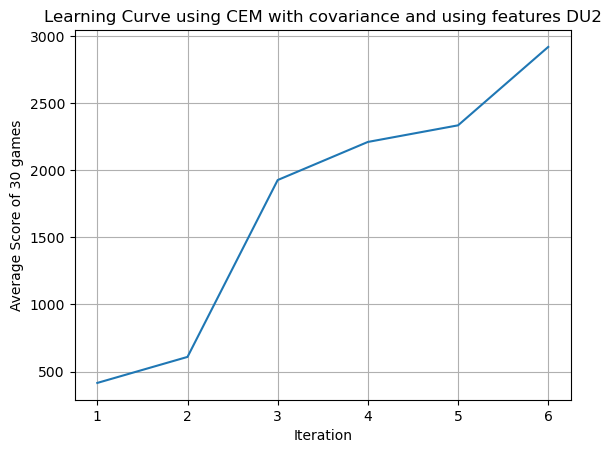

In [3]:
plt.plot(range(1, iterations + 1), learning_curve, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {num_games} games')
plt.title('Learning Curve using CEM with covariance and using features DU2')
plt.grid(True)
plt.show()